### General Info: This is Notebook for visualising  multilayer  tiff exports created with  FLIM-GUIs of SymPhoTime 64 software.

Feature List: 
              -Low and High Intensity Threshod 
             - Lifetime Histogram for all pixels in ROI
              -  Selection of ROI based on a 2D Histogram (Photon COunts vs Intensity weighte Lifetime)Display 
              Intensity Image 
              -Autosaving of all plots created as pdf and all ROI masks as ASCII. 
              -Saving of all layers in tiff as individual ASCII files.

### Before you start:
    -Open Terminal and install the following packages :

#conda install -c conda-forge pims

#conda install -c conda-forge numpy

#conda install -c conda-forge matplotlib

#conda install -c conda-forge scikit-image


In [12]:
################################IMPORT NECESSARY PACKAGES################
import numpy as np
import matplotlib.pyplot as plt
import pims
import skimage
import os
import datetime
#########################################################################

#### Load the an EXAMPLE.tiff
The tiff file should be in the same directory as the  ROI_Selection_notebook.
The number of frames depends on what exactly the image is formed of. 
If the exported image is a fastFLIM images the tiff file will contain 2 frames: --intensity --average lifetime (unfitted, this is the average photon arrival time) After a "FLIM FIT " is performed in SymPhoTime the two frames can be --intensity --average lifetime (intensity weighted average lifetime )

In [13]:
#load image ->transforms  frame objects into arrays
######Image name without the .tiff extension
imageName='daisy'
###############################################
v = pims.TiffStack(imageName +'.tiff')
print('frames: ',len(v))

frames:  2


In [14]:
#Frame objects returned by PIMS are a subclass of numpy.ndarray, adding two new attributes:
#frame_no, an integer
#metadata, a dictionary
intensity=v[0]
lifetime=v[1]
####################
im_size=lifetime.shape # tuple    
im_intensity=np.zeros(im_size)  # initilise the intensity image array
im_lifetime=np.zeros(im_size)    #  initilise the lifetime image array
lifetime2=1E+9*lifetime # lifetime image values given in ns
for i in range(1,im_size[1]):
    im_intensity[i,:] = intensity[i,:]
for j in range(1,im_size[0]):  
    im_lifetime[j,:] = lifetime2[j,:]


###### A BASE NAME  TO BE USED FOR ALL EXPORTS

In [15]:
###### A BASE NAME  TO BE USED FOR ALL EXPORTS ##############################
basename='DAISY_POLLEN_'
###### in Directory  
#### 
DirNAME= datetime.datetime.now().strftime("%Y%m%d-%H_%M")
InitDir = os.getcwd()
os.mkdir(imageName + str(DirNAME))
os.chdir(imageName + str(DirNAME))
#############
#####os.chdir(path)   
############################################

######Save Intensity and Lifetime image as seperate .dat files 
IntenNAME =  basename + '_PhCounts.dat'
LifetimeNAME = basename + 'AvIntenLifetime.dat'
np.savetxt(IntenNAME, im_intensity, fmt="%12.6G")
np.savetxt(LifetimeNAME, im_lifetime, fmt="%12.6G")
#########################################################
TotalPixels=im_lifetime.size                     # TOTAL PIXELS IN THE IMAGE
#######################################################

<IPython.core.display.Javascript object>


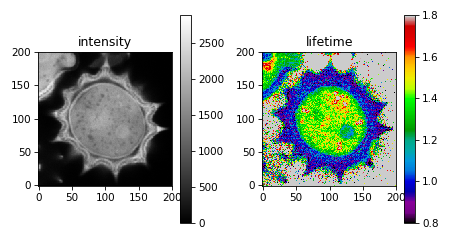

In [16]:
fig1 = plt.figure(figsize=(6, 3.2))
ax11 = fig1.add_subplot(121)
ax12 = fig1.add_subplot(122)
#cax1 = fig1.add_axes([0.12, 0.1, 0.78, 0.8])
ax11.set_title('intensity')
ax11.set_aspect('equal')
plt.sca(ax11)
plt.imshow(im_intensity, cmap="gray", origin='upper')
plt.gca().invert_yaxis()
plt.colorbar(orientation='vertical')
plt.tight_layout()
#plt.show()
ax12.set_title('lifetime')
plt.sca(ax12)
plt.imshow(lifetime2,vmin=.8,vmax=1.8,cmap="nipy_spectral") # This sets the scale for the colormap to 0.8 ns - 1.8 ns
plt.gca().invert_yaxis()
ax12.set_aspect('equal')
plt.colorbar(orientation='vertical')
############################################################################
# SAVE PLOTS #########the following formats can be also used .pdf, .eps. .svg
#intensityNamePNG=basename + 'intensity.png'
intensityNamePDF=basename + 'intensity.pdf'
#plt.savefig(intensityNamePNG, format='png')
plt.savefig(intensityNamePDF, format='pdf')
#plt.show()
#plt.savefig('intensity.eps', format='eps')
######################################################################
#######


#### Set a Low counts Threshold Limit and /or a High counts Threshold limit for your image.
#### apply a simple INTENSITY  threashold. Show all pixels with intensity value equal or more than LOW threashold 
#### or equal or fewer than the  HIGH threashold

### OUTPUT: ROI mask , Intensity/FLIM image with ROI mask applied , Histogram of lifetime for all pixels within ROI, mean lifetime per ROI, Area of ROI as percentage of the field of View

<IPython.core.display.Javascript object>


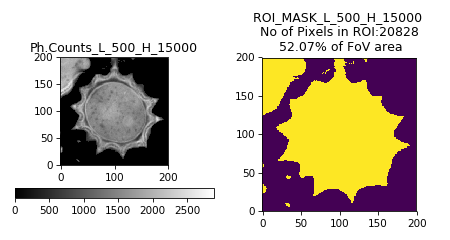

In [17]:
##########################################################################################
LOWthreshold=500 #threshold given in photon counts
HIGHthreshold=15000 
thresNAME='_L_' + str(LOWthreshold) + '_H_'+ str(HIGHthreshold) # Name used for automated saving
##########################################################################################
thres_image_ROI_mask=np.ones(im_size)
for i in range(im_size[0]):
    for j in range(im_size[1]):
        if im_intensity[i,j] < LOWthreshold or im_intensity[i,j] >HIGHthreshold :
            thres_image_ROI_mask[i,j]=0
        
ROI_pixels = np.nonzero(thres_image_ROI_mask)
N_ROIpixels = len(ROI_pixels[1])
ROI_area = 100 * N_ROIpixels / TotalPixels   #ROI AREA as a percentage of the FULL IMAGE
    #    ax87.title.set_text('ROI_mask,No of Pixels: ' + str( N_ROIpixels2))
######SAVE ROI MASK AS ASCII
roimask = basename + thresNAME + '_ROI_Mask.dat'
np.savetxt(roimask, thres_image_ROI_mask, fmt="%12.6G")
#########################################################
fig2 = plt.figure(figsize=(6, 3.2))
ax21 = fig2.add_subplot(121)
ax22 = fig2.add_subplot(122)
ax21.set_title('Ph.Counts' + thresNAME )
ax21.set_aspect('equal')
plt.sca(ax21)

plt.imshow((im_intensity*thres_image_ROI_mask),cmap="gray")
plt.gca().invert_yaxis()
plt.colorbar(orientation='horizontal')
plt.tight_layout()
#plt.show()
# SAVE PLOTS #########the following formats can be also used .pdf, .eps. .svg
THRESIntenNamePNG = basename + thresNAME +'_intensity.png'
THRESIntenNamePDFF= basename + thresNAME +'_intensity.pdf'
#plt.savefig(intensityNamePNG, format='png')
plt.savefig(intensityNamePDF, format='pdf')
#plt.savefig('intensity.eps', format='eps')
######################################################################
ax22.set_title('ROI_MASK'+thresNAME+ ' \n No of Pixels in ROI:' + str( N_ROIpixels) + ' \n ' +  str(ROI_area) +'% of FoV area')
ax21.set_aspect('equal')
ax22.set_aspect('equal')
plt.sca(ax22)

plt.imshow(thres_image_ROI_mask)
plt.gca().invert_yaxis()
# SAVE PLOTS #########the following formats can be also used .pdf, .eps. .svg
THRESROIMASKPNG = basename + thresNAME +'_ROI_Mask.png'
THRESIntenNamePDF= basename + thresNAME +'_ROI_Mask.pdf'
#plt.savefig(THRESROIMASKPNG, format='png')
plt.savefig(THRESIntenNamePDF, format='pdf')
plt.show()
######################################################################

<IPython.core.display.Javascript object>


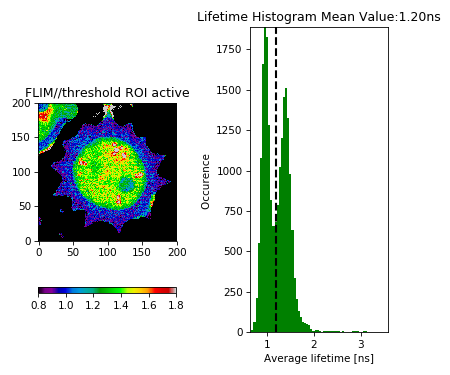

In [18]:
fig3 = plt.figure(figsize=(6,5))
ax31= fig3.add_subplot(121)
ax32= fig3.add_subplot(122)
ax31.set_title('FLIM//threshold ROI active')

plt.sca(ax31)
plt.imshow(lifetime2*thres_image_ROI_mask,vmin=.8,vmax=1.8, cmap="nipy_spectral") 
plt.gca().invert_yaxis()
plt.tight_layout()
# This also sets the scale for the colormap to 0.8 ns - 1.8 ns
ax31.set_aspect('equal')
plt.colorbar(orientation='horizontal')
#plt.show()
ROILifetime = lifetime2*thres_image_ROI_mask
Listlifetime = list(filter(lambda a: a > 0,ROILifetime.flat))
#Listlifetime
#len(List_lifetime)
plt.sca(ax32)
histy, histx, _ = plt.hist(Listlifetime, color='g', bins=61)
plt.axis((0.95*histx.min(),1.05*histx.max(),0, histy.max()));
ROI_lifetime_mean=np.mean(Listlifetime)
plt.axvline(ROI_lifetime_mean, color='k', linestyle='dashed', linewidth=2)
plt.ylabel('Occurence ');
plt.xlabel('Average lifetime [ns]');
ax32.set_title('Lifetime Histogram'+ ' Mean Value:'+ str("%.2f" % ROI_lifetime_mean) + 'ns')
THRESLifetimeNamePNG = basename + thresNAME +'_lifetime.png'
THRESLifetimeNamePDF = basename + thresNAME +'_lifetime.pdf'
###Output is the total number of pixels included in ROI
# SAVE LifetimeNamePDFF= basename + thresNAME +'_LifetimeHisto.pdf'
plt.savefig(THRESLifetimeNamePNG , format='png')
plt.savefig(THRESLifetimeNamePDF, format='pdf')
#plt.savefig('intensity.eps', format='eps')
######################################################################


### Create a "Photon counts per pixel" vs "Intensity weighted Lifetime per pixel" 2D-histogram and perform interactive ROI selection
###After executing the following block you can draw a square with  the mouse on the 2d-Histogram. One can make multiple selections. For each selection the corresponding ROI mask will be saved together with a screenshot of the grpahs. All output will be autonumbered and the ROI selection criteria will be stored in a subfolder with a time-tag.

<IPython.core.display.Javascript object>


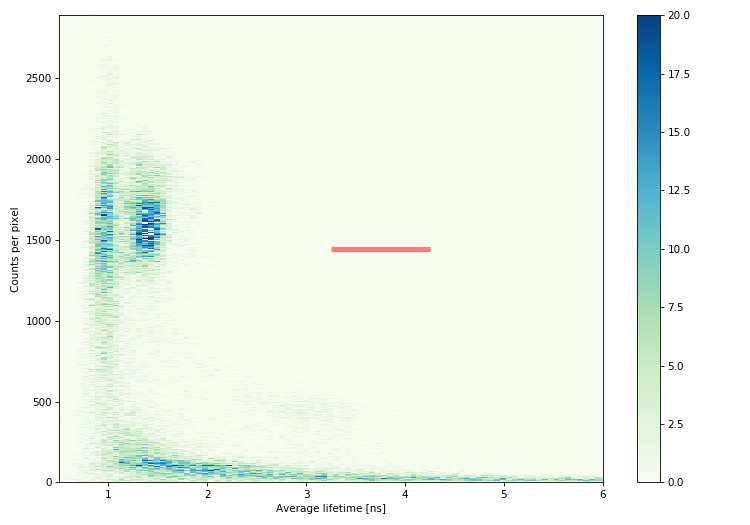

<IPython.core.display.Javascript object>


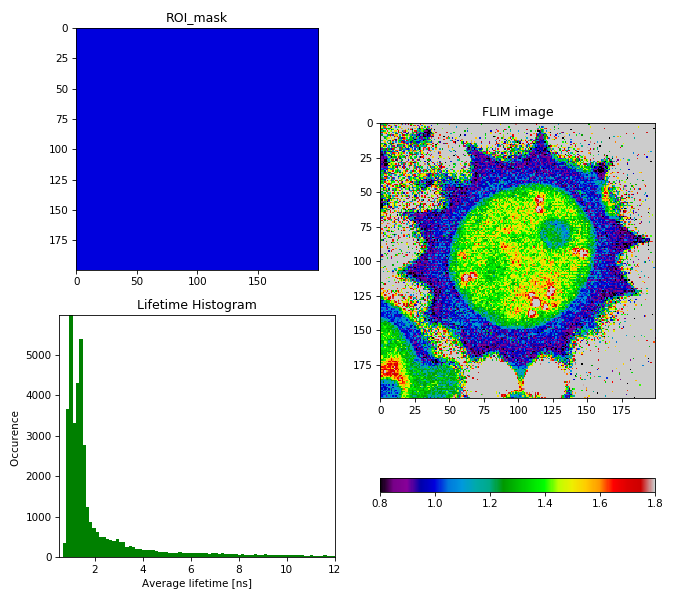

In [20]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import profile_line
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

fig77 = plt.figure(figsize=(10, 7)) 
ax77 =  fig77.add_subplot(111)
#ax77.set_aspect('equal')
intensity=intensity +0.1
h ,xEdges,yEdges, imageH= plt.hist2d(list(im_lifetime.flat), list(intensity.flat), bins=700, cmin=0 ,cmax=20, cmap="GnBu")


ax77.get_xaxis().set_visible(True)
ax77.get_yaxis().set_visible(True)
ax77.patch.set_alpha(0)
########################### ENABLE IF LOG-LOG scale is needed
#ax77.set_yscale('log')
#ax77.set_xscale('log')
########################### ENABLE IF LOG-LOG scale is needed
#plt.hist2d(im_lifetime,im_intensity, norm=LogNorm(), bins=40)
plt.ylabel('Counts per pixel');
plt.xlabel('Average lifetime [ns]');
#plt.axis((0.5E-9,2.5E-9,0,1.25E9));
#####SET LIMITS FOR THE AXES OF THE 2D HISTOGRAM 
plt.axis((0.5,6,1,max(yEdges)));
plt.colorbar()
plt.show()

#CountsLimits=[]
#LifetimeLimits=[]
fig88 = plt.figure('Lifetime Image ROI selection',figsize=(9,8))   
ax88=  fig88.add_subplot(122)
ax89=  fig88.add_subplot(223)
ax87=  fig88.add_subplot(221)
plt.tight_layout()
plt.sca(ax88)
plt.imshow(lifetime2,vmin=.8,vmax=1.8, cmap="nipy_spectral") 
plt.colorbar(orientation='horizontal')
ax88.title.set_text('FLIM image')
ax89.title.set_text('Lifetime Histogram')
ax87.title.set_text('ROI_mask')
plt.sca(ax89)
plt.ylabel('Occurence ');
plt.xlabel('Average lifetime [ns]');
thres_image_ROI_mask=np.ones(im_size)
ROILifetime = lifetime2*thres_image_ROI_mask
Listlifetime = list(filter(lambda a: a > 0,ROILifetime.flat))
histy, histx, _ = plt.hist(Listlifetime, color='g', bins=301)

#####SET LIMITS FOR THE AXES OF THE 1D HISTOGRAM 
plt.axis((0.5,12,0, histy.max()));
plt.sca(ax87)
plt.imshow(thres_image_ROI_mask,vmin=.8,vmax=1.8, cmap="nipy_spectral") 

class DrawBox(object):
    def __init__(self):
        global numbering
        self.ax = plt.gca()
        ymin, ymax = self.ax.get_ylim()
        xmin, xmax = self.ax.get_xlim()
        self.rect = Rectangle((xmin+ 0.5*(xmax-xmin),ymin+0.5*(ymax-ymin)), 1, 1,edgecolor='r', facecolor='r', alpha=0.5, linewidth='5', )
        self.x0 = None
        self.y0 = None
        self.x1 = None
        self.y1 = None
        #ann1 = None
        #ann1 = None
        self.ax.add_patch(self.rect)
        self.ax.figure.canvas.mpl_connect('button_press_event', self.on_press)
        self.ax.figure.canvas.mpl_connect('button_release_event', self.on_release)
        ax77.txt = ax77.text(0., 0.,'',transform=ax77.transAxes,color='k',zorder=1)
        numbering=0
    def on_press(self, event):
        global ann1
        global ann2
        global numbering
        #print 'press'
        self.x0 = event.xdata
        self.y0 = event.ydata
        ann1.remove()
        ann2.remove()
        numbering = numbering+1
    def on_release(self, event):
       # print 'release'
        global ann1
        global ann2
        global numbering
        
        #numberingName=numbering+1
        self.x1 = event.xdata
        self.y1 = event.ydata
        self.rect.set_width(self.x1 - self.x0)
        self.rect.set_height(self.y1 - self.y0)
        self.rect.set_xy((self.x0, self.y0))
        self.ax.figure.canvas.draw()
       # CountsLimits=[self.y1 , self.y0]
       # LifetimeLimits= [self.x1, self.x0]
        thres_image_ROI_mask2=np.ones(im_size)
        for i in range(im_size[0]):
            for j in range(im_size[1]):
                if im_intensity[i,j] > self.y0 or im_intensity[i,j]< self.y1:
                    thres_image_ROI_mask2[i,j]=0
                elif  im_lifetime[i,j] < self.x0 or im_lifetime[i,j]> self.x1:
                            thres_image_ROI_mask2[i,j]=0
        ROILifetime = lifetime2*thres_image_ROI_mask2
        Listlifetime = list(filter(lambda a: a > 0,ROILifetime.flat))
        plt.sca(ax87)
        plt.imshow(thres_image_ROI_mask2)
        plt.gca().invert_yaxis()
        ROI_pixels2 = np.nonzero(thres_image_ROI_mask2)
        N_ROIpixels2=len(ROI_pixels2[1]) 
        ROI_area = 100 * N_ROIpixels2 / TotalPixels
        #ROI_AREA2 = 100 * N_ROI_pixels2/TotalPixels
        #ax77.txt.set_text('x=%1.2f, y=%1.2f' % (self.x1 , self.y1 ))
        plt.sca(ax88)
        plt.imshow(lifetime2*thres_image_ROI_mask2,vmin=.8,vmax=1.8, cmap="nipy_spectral") 
        plt.gca().invert_yaxis()
        ann1=ax77.annotate('bottom right: \n x=%1.2f, y=%1.0f' %(self.x1 , round( self.y1) ) , xy=(2, 1), xytext=(self.x1, self.y1) )
        ann2=ax77.annotate('upper left: \n x=%1.2f, y=%1.0f' %(self.x0 , round(self.y0) ) , xy=(2, 1), xytext=(self.x0, self.y0) )
        #ROI_NAME='ROI_Lifetime_'+ str("%1.2f" % self.x0)+ '_' +  str("%1.2f" % self.x1) + '_Counts_' + str("%1.0f" % self.y1) + '_' +str("%1.0f" % self.y0)
        ROI_NAME ='ROI_Lifetime_'+ str("%1.2f" % self.x0)+ '_' +  str("%1.2f" % self.x1) + '_Counts_' + str("%1.0f" % self.y1) + '_' +str("%1.0f" % self.y0)
        ax87.title.set_text(ROI_NAME+ ' \n No of Pixels: ' + str( N_ROIpixels2)+ ' \n '  + str("%1.2f" % ROI_area) + '% of FoV area')
        plt.sca(ax89)
        plt.cla()
        histy, histx, _ = plt.hist(Listlifetime, color='g', bins=61)
        plt.axis((0.95*histx.min(),1.05*histx.max(),0, histy.max()));
        ROI_lifetime_mean=np.mean(Listlifetime)
        plt.axvline(ROI_lifetime_mean, color='k', linestyle='dashed', linewidth=2)
        plt.ylabel('Occurence ');
        plt.xlabel('Average lifetime [ns]');
        ax89.title.set_text('LT Hist,Mean Lifetime of ROI:' + str("%.2f" %ROI_lifetime_mean) + 'ns')
        #plt.axis((0.5E-9,2.5E-9,0,1.25E9)); 
        THRESLifetimeNamePDF2 = str(numbering)+'_' + basename + ROI_NAME +'_.pdf'
        ###Output is the total number of pixels included in ROI
        # SAVE LifetimeNamePDFF= basename + thresNAME +'_LifetimeHisto.pdf'
        plt.savefig(THRESLifetimeNamePDF2, format='pdf')
        ######SAVE ROI MASK AS ASCII
        roimask2Name = str(numbering)+ '_'+ basename + ROI_NAME + '_Mask.dat'
        np.savetxt(roimask2Name,  thres_image_ROI_mask2, fmt="%12.6G")
        plt.sca(ax77)
        ROI_HIST_NAME= str(numbering)+ '_SelectionOverview' + THRESLifetimeNamePDF2
        plt.savefig(ROI_HIST_NAME, format='pdf')
#########################################################
#plt.savefig('intensity.eps', format='eps')
######################################################################

        
        
#len(Listlifetime)
###Output is the total number of pixels included in ROI
        
plt.sca(ax77)
a = DrawBox()
plt.show()

## Go back to initial directory and be ready to start again


In [21]:
######RETURN  TO INITIAL DIRECTORY , in which the original tiff file was saved. 

os.chdir(InitDir)